In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from matplotlib.patches import Patch
from matplotlib.ticker import FuncFormatter
import seaborn as sns

print("Pandas version: {}".format(pd.__version__))
print("NumPy version: {}".format(np.__version__))

Pandas version: 2.2.3
NumPy version: 2.1.1


In [14]:
result_dir = "../results/pcap"
fig_dir = "./figures"
exporters = ["argus", "cicflowmeter", "go-flows", "nfstream", "nprobe", "rustiflow", "zeek"] # , "ntlflowlyzer"

In [3]:
df_all = pd.DataFrame()
for exporter in exporters:
    df = pd.read_csv(f"{result_dir}/{exporter}/summary_metrics.csv")
    df_all = pd.concat([df_all, df])

In [4]:
df_all

,DateTime,Extractor,Folder,PCAP File,Runtime (s),Avg_CPU_Usage (%),Avg_Memory_Usage (MB),Max_Memory_Usage (MB),CPU Cores,CPU Logical Cores,Total Memory (MB),Available Memory (MB)
0,2024-10-09 15:20:18,argus,/data/monday,sample_100k,0.634853,0.000000,29.078125,29.078125,16,32,48236.550781,45167.820312
1,2024-10-09 15:20:19,argus,/data/monday,sample_500k,1.247535,0.000000,23.869141,43.976562,16,32,48236.550781,45164.605469
2,2024-10-09 15:20:20,argus,/data/monday,sample_1M,2.132355,43.166667,70.697917,161.312500,16,32,48236.550781,45165.671875
3,2024-10-09 15:20:22,argus,/data/monday,sample_2M,4.514567,57.320000,108.834375,166.218750,16,32,48236.550781,45163.929688
4,2024-10-09 15:20:27,argus,/data/monday,sample_4M,20.193884,45.935000,164.558398,198.921875,16,32,48236.550781,45164.027344
...,...,...,...,...,...,...,...,...,...,...,...,...
30,2024-10-08 17:06:46,zeek,/data/cicids2017,cicids2017,1002.599112,124.965335,185.889848,220.292969,16,32,48236.550781,45140.761719
31,2024-10-08 17:23:29,zeek,/data/cicids2017,cicids2017,1022.986641,124.263503,185.068688,220.406250,16,32,48236.550781,45145.800781
32,2024-10-08 17:40:32,zeek,/data/cicids2017,cicids2017,991.355672,124.980909,185.529167,219.230469,16,32,48236.550781,45144.910156
33,2024-10-08 17:57:04,zeek,/data/cicids2017,cicids2017,983.200660,126.173218,182.945758,219.089844,16,32,48236.550781,45147.699219


In [10]:
df_all.groupby(['Extractor', 'PCAP File'])[['Runtime (s)', 'Avg_CPU_Usage (%)', 'Max_Memory_Usage (MB)']].agg(['mean', 'std'])

Runtime (s)            Avg_CPU_Usage (%)  \
                                 mean        std              mean   
Extractor    PCAP File                                               
argus        cicids2017    189.755957   7.130473        137.173008   
             sample_100k     0.700872   0.069395          0.000000   
             sample_1M       4.544342   1.351741         40.727333   
             sample_2M       8.822807   2.424659         43.695636   
             sample_4M      20.400195   0.542140         48.098429   
             sample_500k     2.385708   0.678996         14.460000   
             sample_8M      39.411879   2.713957         82.691980   
cicflowmeter sample_100k     2.935835   0.292685        209.723333   
             sample_1M      23.857144   1.165382        849.499155   
             sample_2M      56.042343   2.055212       1149.626368   
             sample_4M     141.923291   5.677512       1373.552420   
             sample_500k    10.806304   0.679016        520.645485   
             sample_8M     313.408652  28.748464       1397.256301   
go-flows     cicids2017    133.427693  22.599793        209.775168   
             sample_100k     0.284776   0.103093          0.000000   
             sample_1M       4.336168   0.415395         73.356000   
             sample_2M       8.844193   0.503212         77.659556   
             sample_4M      18.177744   1.181960         82.552860   
             sample_500k     1.918446   0.314191         62.200000   
             sample_8M      32.211089   3.450374        107.938300   
nfstream     cicids2017    364.418632  12.816753        958.756632   
             sample_100k     1.450336   0.270478        123.390000   
             sample_1M       7.751669   0.786805        600.678810   
             sample_2M      15.436237   1.297020        669.530143   
             sample_4M      27.549665   0.636921        751.071481   
             sample_500k     4.205963   0.143973        494.175000   
             sample_8M      57.799458   8.504168        816.911446   
nprobe       cicids2017    248.460639   2.172777         87.522793   
             sample_100k     3.517915   0.060303         12.170000   
             sample_1M       7.070614   0.357842         49.422500   
             sample_2M      10.856394   0.325426         64.131970   
             sample_4M      19.906342   1.033272         74.073124   
             sample_500k     5.163336   0.365770         37.576000   
             sample_8M      43.022432   5.107191         84.441769   
rustiflow    cicids2017    152.868897  10.733682        237.374290   
             sample_100k     0.266972   0.044920          0.000000   
             sample_1M       3.491947   0.323895        126.593333   
             sample_2M       6.948956   0.674488        143.760040   
             sample_4M      14.389322   1.323008        149.551014   
             sample_500k     1.572447   0.137102         96.490000   
             sample_8M      25.293689   2.893339        191.348718   
zeek         cicids2017   1000.165765  14.936679        125.035332   
             sample_100k     2.569161   0.700916         83.175000   
             sample_1M      11.922081   2.369928        103.153553   
             sample_2M      20.417800   2.480948        103.994505   
             sample_4M      43.387416   6.476937        107.495294   
             sample_500k     7.700167   2.144982        102.128333   
             sample_8M     125.311839  16.241419        117.673931   

                                     Max_Memory_Usage (MB)               
                                 std                  mean          std  
Extractor    PCAP File                                                   
argus        cicids2017     6.151859           1755.120312    69.434110  
             sample_100k    0.000000              8.764062    11.356013  
             sample_1M     10.859821            169.418750    30.560911  
           

# Runtime for all exporters in function of pcap size

In [12]:
colors = ["#6C8EBF", "#82B366", "#D6B656", "#B85450", "#9673A6", "#fba559", "#ae8982", "#e89fd2"]
sns.color_palette(colors)

[(0.4235294117647059, 0.5568627450980392, 0.7490196078431373),
 (0.5098039215686274, 0.7019607843137254, 0.4),
 (0.8392156862745098, 0.7137254901960784, 0.33725490196078434),
 (0.7215686274509804, 0.32941176470588235, 0.3137254901960784),
 (0.5882352941176471, 0.45098039215686275, 0.6509803921568628),
 (0.984313725490196, 0.6470588235294118, 0.34901960784313724),
 (0.6823529411764706, 0.5372549019607843, 0.5098039215686274),
 (0.9098039215686274, 0.6235294117647059, 0.8235294117647058)]

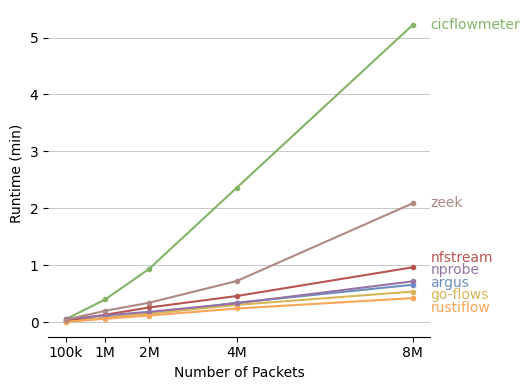

In [20]:
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=sns.color_palette(colors))

fig, ax = plt.subplots(figsize=(5.4, 4))
ax.yaxis.grid(True, linewidth=0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(True)

sizes = {
    'sample_100k': 100000,
    # 'sample_500k': 500000,
    'sample_1M': 1000000,
    'sample_2M': 2000000,
    'sample_4M': 4000000,
    'sample_8M': 8000000,
    # 'cicids2017': 50000000,
}

label_offsets = {
    'cicflowmeter': 0,
    'zeek': 0,
    'nfstream': 10,
    'nprobe': 12,
    'argus': 2,
    'go-flows': -4,
    'rustiflow': -10,
}

for exporter in exporters:
    df = df_all[df_all['Extractor'] == exporter].groupby('PCAP File')['Runtime (s)'].mean()

    # Create a list of sizes and corresponding runtimes
    x_sizes = [size for size in sizes.values()]
    y_runtimes = [df[pcap] for pcap in sizes.keys()]

    # if exporter == 'cicflowmeter':
    #     # skip last datapoint 
    #     x_sizes = x_sizes[:-1]
    #     y_runtimes = y_runtimes[:-1]
    
    # Plot using sizes on the x-axis
    line, = ax.plot(x_sizes, y_runtimes, marker='.', linestyle='-', label=exporter)
    # Add exporter name next to the last data point in the same color
    ax.text(x_sizes[-1] * 1.05, y_runtimes[-1] + label_offsets[exporter], exporter, color=line.get_color(), verticalalignment='center')

ax.set_xticks(x_sizes)
ax.set_yticks([0, 60, 120, 180, 240, 300])
ax.set_xticklabels(['100k', '1M', '2M', '4M', '8M'])
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x / 60:.0f}'))
ax.set_xlabel('Number of Packets')
ax.set_ylabel('Runtime (min)')
# ax.legend()
plt.tight_layout()
plt.savefig(f'{fig_dir}/runtime_vs_packets.pdf', bbox_inches='tight')
plt.show()

argus: PCAP File
cicids2017     1755.120312
sample_100k       8.764062
sample_1M       169.418750
sample_2M       169.918750
sample_4M       220.405469
sample_500k     136.309375
sample_8M       409.632031
Name: Max_Memory_Usage (MB), dtype: float64
cicflowmeter: PCAP File
sample_100k     381.594531
sample_1M       989.235937
sample_2M      1136.611719
sample_4M      1590.494531
sample_500k     856.276562
sample_8M      3671.567187
Name: Max_Memory_Usage (MB), dtype: float64
go-flows: PCAP File
cicids2017     215.446094
sample_100k      3.979687
sample_1M       84.305469
sample_2M       95.855469
sample_4M      106.065625
sample_500k     67.724219
sample_8M      134.314844
Name: Max_Memory_Usage (MB), dtype: float64
nfstream: PCAP File
cicids2017     1207.604687
sample_100k     746.935156
sample_1M       768.721875
sample_2M       775.609375
sample_4M       808.871094
sample_500k     764.353906
sample_8M       973.368750
Name: Max_Memory_Usage (MB), dtype: float64
nprobe: PCAP File
cic

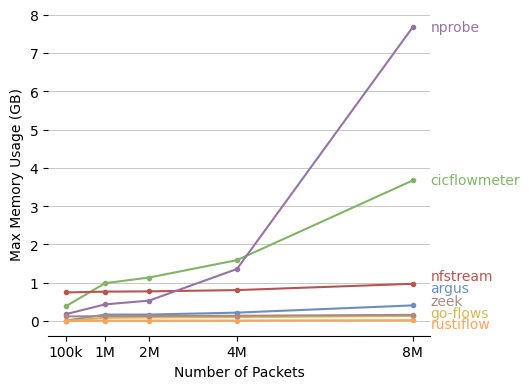

In [16]:
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=sns.color_palette(colors))

fig, ax = plt.subplots(figsize=(5.4, 4))
ax.yaxis.grid(True, linewidth=0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(True)

sizes = {
    'sample_100k': 100000,
    # 'sample_500k': 500000,
    'sample_1M': 1000000,
    'sample_2M': 2000000,
    'sample_4M': 4000000,
    'sample_8M': 8000000,
    # 'cicids2017': 50000000,
}

label_offsets = {
    'cicflowmeter': 0,
    'zeek': 350,
    'nfstream': 200,
    'nprobe': -0,
    'argus': 450,
    'go-flows': 70,
    'rustiflow': -100,
}

for exporter in exporters:
    df = df_all[df_all['Extractor'] == exporter].groupby('PCAP File')['Max_Memory_Usage (MB)'].mean()

    print(f"{exporter}: {df}")
    # Create a list of sizes and corresponding runtimes
    x_sizes = [size for size in sizes.values()]
    y_runtimes = [df[pcap] for pcap in sizes.keys()]
    
    # Plot using sizes on the x-axis
    line, = ax.plot(x_sizes, y_runtimes, marker='.', linestyle='-', label=exporter)
    # Add exporter name next to the last data point in the same color
    ax.text(x_sizes[-1] * 1.05, y_runtimes[-1] + label_offsets[exporter], exporter, color=line.get_color(), verticalalignment='center')

ax.set_xticks(x_sizes)
# ax.set_yticks([0, 60, 120, 180, 240, 300])
ax.set_xticklabels(['100k', '1M', '2M', '4M', '8M'])
# ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x / 60:.0f}'))
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x / 1024:.0f}'))
ax.set_xlabel('Number of Packets')
ax.set_ylabel('Max Memory Usage (GB)')
# ax.legend()
plt.tight_layout()
plt.savefig(f'{fig_dir}/mem_vs_packets.pdf', bbox_inches='tight')
plt.show()

argus: PCAP File
cicids2017     137.173008
sample_100k      0.000000
sample_1M       40.727333
sample_2M       43.695636
sample_4M       48.098429
sample_500k     14.460000
sample_8M       82.691980
Name: Avg_CPU_Usage (%), dtype: float64
cicflowmeter: PCAP File
sample_100k     209.723333
sample_1M       849.499155
sample_2M      1149.626368
sample_4M      1373.552420
sample_500k     520.645485
sample_8M      1397.256301
Name: Avg_CPU_Usage (%), dtype: float64
go-flows: PCAP File
cicids2017     209.775168
sample_100k      0.000000
sample_1M       73.356000
sample_2M       77.659556
sample_4M       82.552860
sample_500k     62.200000
sample_8M      107.938300
Name: Avg_CPU_Usage (%), dtype: float64
nfstream: PCAP File
cicids2017     958.756632
sample_100k    123.390000
sample_1M      600.678810
sample_2M      669.530143
sample_4M      751.071481
sample_500k    494.175000
sample_8M      816.911446
Name: Avg_CPU_Usage (%), dtype: float64
nprobe: PCAP File
cicids2017     87.522793
sample_1

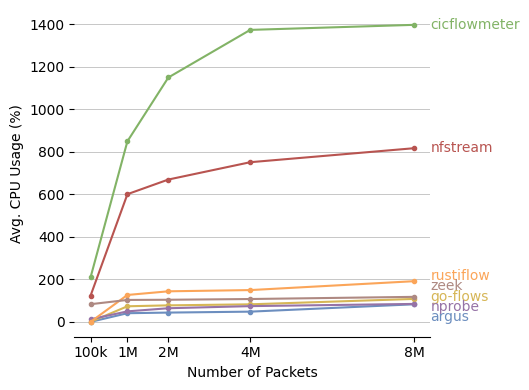

In [17]:
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=sns.color_palette(colors))

fig, ax = plt.subplots(figsize=(5.4, 4))
ax.yaxis.grid(True, linewidth=0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(True)

sizes = {
    'sample_100k': 100000,
    # 'sample_500k': 500000,
    'sample_1M': 1000000,
    'sample_2M': 2000000,
    'sample_4M': 4000000,
    'sample_8M': 8000000,
    # 'cicids2017': 50000000,
}

label_offsets = {
    'cicflowmeter': 0,
    'zeek': 50,
    'nfstream': 0,
    'nprobe': -15,
    'argus': -60,
    'go-flows': 10,
    'rustiflow': 25,
}

for exporter in exporters:
    df = df_all[df_all['Extractor'] == exporter].groupby('PCAP File')['Avg_CPU_Usage (%)'].mean()

    print(f"{exporter}: {df}")
    # Create a list of sizes and corresponding runtimes
    x_sizes = [size for size in sizes.values()]
    y_runtimes = [df[pcap] for pcap in sizes.keys()]
    
    # Plot using sizes on the x-axis
    line, = ax.plot(x_sizes, y_runtimes, marker='.', linestyle='-', label=exporter)
    # Add exporter name next to the last data point in the same color
    ax.text(x_sizes[-1] * 1.05, y_runtimes[-1] + label_offsets[exporter], exporter, color=line.get_color(), verticalalignment='center')

ax.set_xticks(x_sizes)
# ax.set_yticks([0, 60, 120, 180, 240, 300])
ax.set_xticklabels(['100k', '1M', '2M', '4M', '8M'])
# ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x / 60:.0f}'))
ax.set_xlabel('Number of Packets')
ax.set_ylabel('Avg. CPU Usage (%)')
# ax.legend()
plt.tight_layout()
plt.savefig(f'{fig_dir}/cpu_vs_packets.pdf', bbox_inches='tight')
plt.show()

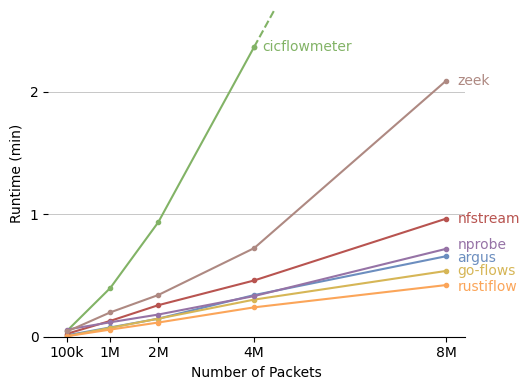

In [19]:
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=sns.color_palette(colors))

fig, ax = plt.subplots(figsize=(5.4, 4))
ax.yaxis.grid(True, linewidth=0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(True)

sizes = {
    'sample_100k': 100000,
    # 'sample_500k': 500000,
    'sample_1M': 1000000,
    'sample_2M': 2000000,
    'sample_4M': 4000000,
    'sample_8M': 8000000,
}

label_offsets = {
    'cicflowmeter': 0,
    'zeek': 0,
    'nfstream': 0,
    'nprobe': 2,
    'argus': -1,
    'go-flows': 0,
    'rustiflow': -1,
}

for exporter in exporters:
    df = df_all[df_all['Extractor'] == exporter].groupby('PCAP File')['Runtime (s)'].mean()

    # Create a list of sizes and corresponding runtimes
    x_sizes = [size for size in sizes.values()]
    y_runtimes = [df[pcap] for pcap in sizes.keys()]

    if exporter == 'cicflowmeter':
        # Plot using sizes on the x-axis
        line, = ax.plot(x_sizes[:-1], y_runtimes[:-1], marker='.', linestyle='-', label=exporter)
        # Plot using sizes on the x-axis
        line, = ax.plot(x_sizes[-2:], y_runtimes[-2:], marker='.', linestyle='--', label=exporter, color=line.get_color())
        # Add exporter name next to the last data point in the same color
        ax.text(x_sizes[-2] * 1.04, y_runtimes[-2] + label_offsets[exporter], exporter, color=line.get_color(), verticalalignment='center')
    else:
        # Plot using sizes on the x-axis
        line, = ax.plot(x_sizes, y_runtimes, marker='.', linestyle='-', label=exporter)
        # Add exporter name next to the last data point in the same color
        ax.text(x_sizes[-1] * 1.03, y_runtimes[-1] + label_offsets[exporter], exporter, color=line.get_color(), verticalalignment='center')

ax.set_xticks(x_sizes)
ax.set_xticklabels(['100k', '1M', '2M', '4M', '8M'])
ax.set_yticks([0, 60, 120])
ax.set_ylim(0, 160)
# ax.set_yticklabels(['0', '1', '2', '5'])
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x / 60:.0f}'))
ax.set_xlabel('Number of Packets')
ax.set_ylabel('Runtime (min)')
# ax.legend()
plt.tight_layout()
plt.savefig(f'{fig_dir}/runtime_vs_packets_zoom.pdf', bbox_inches='tight')
plt.show()

# Color Experimentation

In [146]:
edge_colors = ["#3c618f", "#53833a", "#a28727", "#842628", "#674777", "#D79B00", "#666666"]
sns.color_palette(edge_colors)

[(0.23529411764705882, 0.3803921568627451, 0.5607843137254902),
 (0.3254901960784314, 0.5137254901960784, 0.22745098039215686),
 (0.6352941176470588, 0.5294117647058824, 0.15294117647058825),
 (0.5176470588235295, 0.14901960784313725, 0.1568627450980392),
 (0.403921568627451, 0.2784313725490196, 0.4666666666666667),
 (0.8431372549019608, 0.6078431372549019, 0.0),
 (0.4, 0.4, 0.4)]

In [184]:
colors = ["#6C8EBF", "#82B366", "#D6B656", "#B85450", "#9673A6", "#fba559", "#ae8982", "#e89fd2"]
sns.color_palette(colors)

[(0.4235294117647059, 0.5568627450980392, 0.7490196078431373),
 (0.5098039215686274, 0.7019607843137254, 0.4),
 (0.8392156862745098, 0.7137254901960784, 0.33725490196078434),
 (0.7215686274509804, 0.32941176470588235, 0.3137254901960784),
 (0.5882352941176471, 0.45098039215686275, 0.6509803921568628),
 (0.984313725490196, 0.6470588235294118, 0.34901960784313724),
 (0.6823529411764706, 0.5372549019607843, 0.5098039215686274),
 (0.9098039215686274, 0.6235294117647059, 0.8235294117647058)]

In [140]:
def get_color_palette(groups=[1, 1, 3, 3, 3], palette='tab10'):
    palette_all = sns.color_palette(palette, len(groups))
    palette_extended_all = []
    for base_color, n_elem in zip(palette_all, groups):
        shades = sns.light_palette(base_color, n_elem + 3)  # Sequential shades for each base color
        palette_extended_all.extend(shades[2:-1])  # Skip the lightest and darkest colors and add the rest
    return sns.color_palette(palette_extended_all)
get_color_palette([1, 1, 1, 1, 1, 1, 1])

[(0.39408824258654296, 0.6257672230097956, 0.7877349384588888),
 (0.9841039714811368, 0.6458134136044578, 0.3493722001601455),
 (0.42253365559849243, 0.7355270178445694, 0.42250381041024215),
 (0.8764892485964284, 0.41577487243100275, 0.4183526464241727),
 (0.7018869640907233, 0.5834925608983208, 0.8100467675611402),
 (0.6817295775858848, 0.5390234233312372, 0.5100168024566855),
 (0.9099427176361898, 0.6249211603598974, 0.8225918660182985)]

In [182]:
import matplotlib.colors as mcolors
mcolors.to_hex(get_color_palette([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])[6])

'#e89fd2'

In [163]:
sns.color_palette("muted")

[(0.2823529411764706, 0.47058823529411764, 0.8156862745098039),
 (0.9333333333333333, 0.5215686274509804, 0.2901960784313726),
 (0.41568627450980394, 0.8, 0.39215686274509803),
 (0.8392156862745098, 0.37254901960784315, 0.37254901960784315),
 (0.5843137254901961, 0.4235294117647059, 0.7058823529411765),
 (0.5490196078431373, 0.3803921568627451, 0.23529411764705882),
 (0.8627450980392157, 0.49411764705882355, 0.7529411764705882),
 (0.4745098039215686, 0.4745098039215686, 0.4745098039215686),
 (0.8352941176470589, 0.7333333333333333, 0.403921568627451),
 (0.5098039215686274, 0.7764705882352941, 0.8862745098039215)]